# Capstone Project - US Department of the Treasury Monthly Statistical Release of Materials used in the Production of Beer

There is a monthly report that the US Department of the Treasury publishes about the brewery industry.  This report includes all the ingredients that the breweries used starting from October 1983 till December 2014.  All ingredients are in pounds(lbs). 

## 1. Can you count something interesting?

These reports show the category of ingredients breweries use each month.  The ingredients include malt, corn, rice, barley, wheat, sorgum, soy beans, sugars and sirups, hops (used dry and as extracts) and other ingredients that include various adjuncts which contribute to production.

## 2. Can you find some trends?

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [17]:
beer = pd.read_csv('TTB_Beer_Stats.csv')

In [18]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 13 columns):
month               375 non-null object
year                375 non-null int64
malt                371 non-null float64
corn                371 non-null float64
rice                371 non-null float64
barley              371 non-null float64
wheat               369 non-null float64
sorgum_grain        91 non-null float64
soy_bean            39 non-null float64
sugar_and_sirups    371 non-null float64
hops(dry)           371 non-null float64
hops(extracts)      371 non-null float64
other               321 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 38.2+ KB


In [19]:
beer.wheat.describe()

count    3.690000e+02
mean     7.881700e+05
std      8.730576e+05
min      3.000000e+00
25%      2.568500e+04
50%      6.046980e+05
75%      1.229670e+06
max      5.019351e+06
Name: wheat, dtype: float64

In [20]:
beer.corr()

,year,malt,corn,rice,barley,wheat,sorgum_grain,soy_bean,sugar_and_sirups,hops(dry),hops(extracts),other
year,1.000000,-0.469096,-0.782499,-0.543876,0.705959,0.845325,-0.396905,0.111492,0.583583,0.159068,-0.573511,-0.094870
malt,-0.469096,1.000000,0.593294,0.717502,-0.425595,-0.340918,0.196766,-0.018342,-0.040882,-0.279394,0.602418,0.249440
corn,-0.782499,0.593294,1.000000,0.337974,-0.439294,-0.577107,0.229361,-0.109362,-0.342991,-0.109893,0.552419,-0.000913
rice,-0.543876,0.717502,0.337974,1.000000,-0.637745,-0.573926,0.232371,0.036297,-0.273174,-0.200323,0.525751,0.226799
barley,0.705959,-0.425595,-0.439294,-0.637745,1.000000,0.837108,-0.176542,-0.473449,0.487278,0.153263,-0.486200,-0.076060
wheat,0.845325,-0.340918,-0.577107,-0.573926,0.837108,1.000000,-0.272584,-0.069483,0.632604,0.097778,-0.521988,-0.040817
sorgum_grain,-0.396905,0.196766,0.229361,0.232371,-0.176542,-0.272584,1.000000,-0.449053,0.170873,0.444348,0.421928,-0.236536
soy_bean,0.111492,-0.018342,-0.109362,0.036297,-0.473449,-0.069483,-0.449053,1.000000,0.168998,-0.054078,0.064191,-0.305078
sugar_and_sirups,0.583583,-0.040882,-0.342991,-0.273174,0.487278,0.632604,0.170873,0.168998,1.000000,-0.068219,-0.326358,-0.479492
hops(dry),0.159068,-0.279394,-0.109893,-0.200323,0.153263,0.097778,0.444348,-0.054078,-0.068219,1.000000,-0.151686,-0.065493


Using the 'coor' function within pandas, I see a few trends.  As the years get larger, it seems there is more barley (r=0.706) and wheat (r=0.845) being used in beer production while corn (r=-0.78) is being used less.  Also, it seems rice and malt (r=0.718), and wheat and barley (r=0.837) are being used more together while barley is being used more and rice less (r=-0.638).

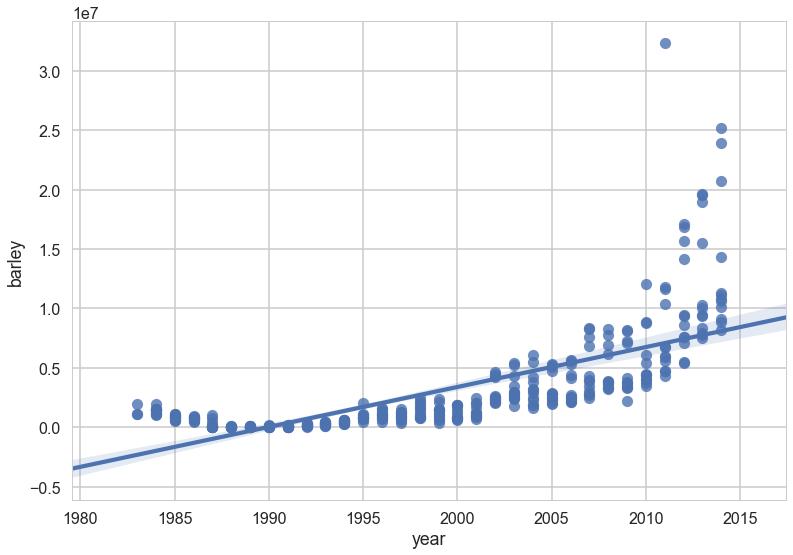

In [21]:
sns.regplot(y="barley", x="year", data=beer, fit_reg = True)
plt.show()

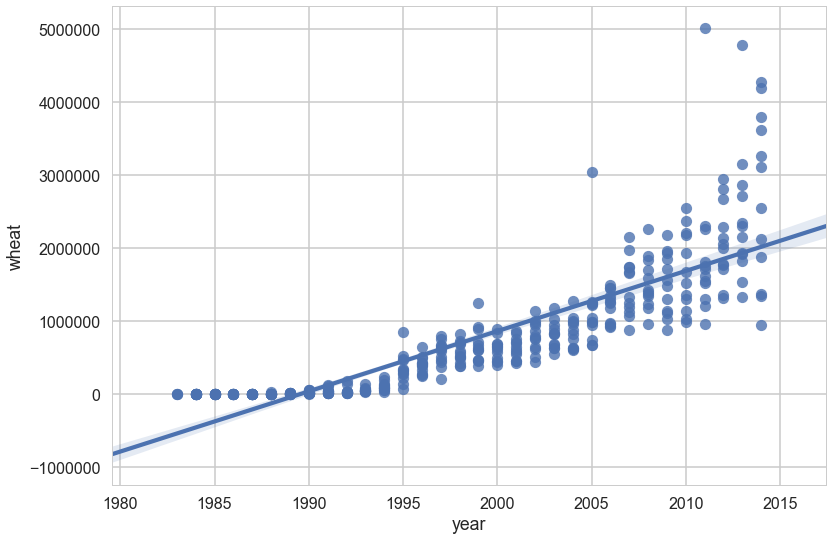

In [22]:
sns.regplot(y="wheat", x="year", data=beer, fit_reg = True)
plt.show()

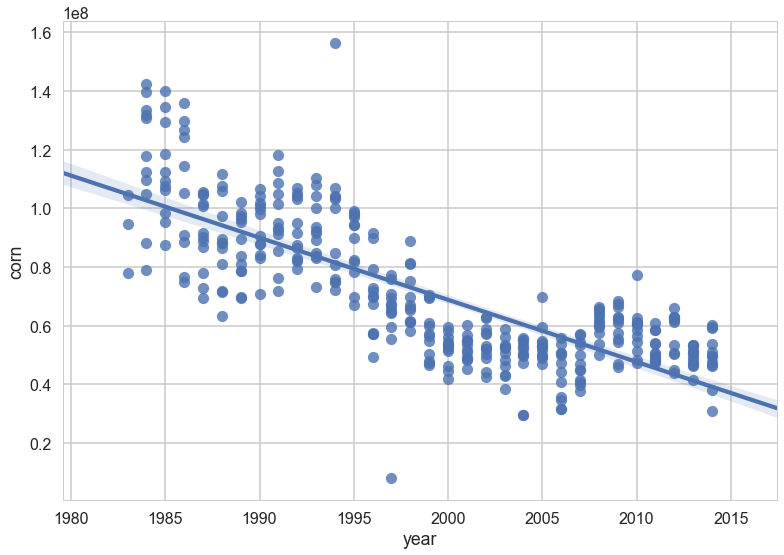

In [23]:
sns.regplot(y="corn", x="year", data=beer, fit_reg = True)
plt.show()

## 3. Can you make a bar plot or a histogram?

Yes, I can create a bar plot that compares the range of years against different ingredients used in beer production.  I just used the data from January of each year.

In [24]:
jan_data = beer.loc[beer['month'] == 'jan']
jan_data_year_index = jan_data.set_index(['year'])
jan_data_year_index.index.name = None
jan_data_year_index.head()

,month,malt,corn,rice,barley,wheat,sorgum_grain,soy_bean,sugar_and_sirups,hops(dry),hops(extracts),other
1984,jan,356855274.0,104930639.0,71675070.0,1449528.0,26.0,NaN,2079.0,41367242.0,2297285.0,865376.0,NaN
1985,jan,378035550.0,95326307.0,83963630.0,812600.0,21.0,NaN,1922.0,41367242.0,2297285.0,312835.0,NaN
1986,jan,392778077.0,105315928.0,85044055.0,748977.0,300.0,NaN,1839.0,44181527.0,2907644.0,492805.0,NaN
1987,jan,394752515.0,86783219.0,88730152.0,752341.0,2425.0,NaN,NaN,43218814.0,3050972.0,461354.0,NaN
1988,jan,379224742.0,86452485.0,86410985.0,56899.0,6430.0,NaN,NaN,50076605.0,2992650.0,736539.0,NaN


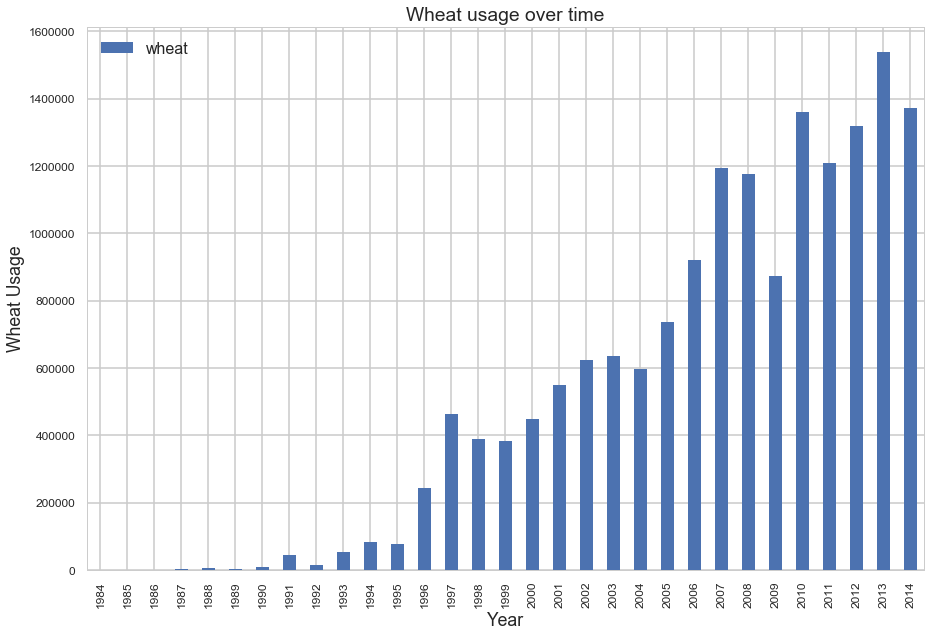

In [25]:
graph = jan_data_year_index[['wheat']].plot(kind='bar', title ="Wheat usage over time", figsize=(15, 10), fontsize=12)
graph.set_xlabel('Year')
graph.set_ylabel('Wheat Usage')
plt.show()

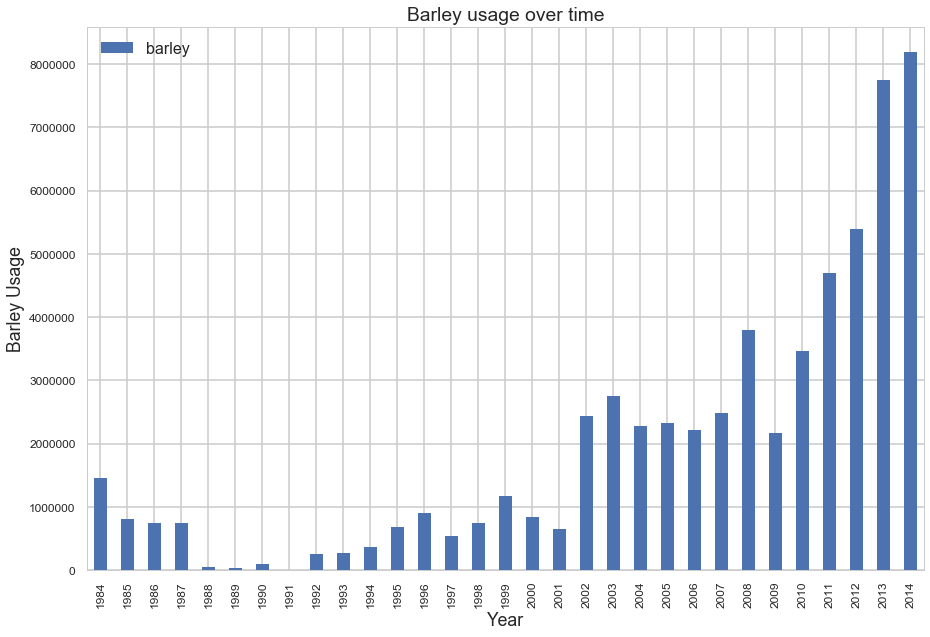

In [26]:
graph2 = jan_data_year_index[['barley']].plot(kind='bar', title ="Barley usage over time", figsize=(15, 10), fontsize=12)
graph2.set_xlabel('Year')
graph2.set_ylabel('Barley Usage')
plt.show()

## 4. Can you compare two related quantities?

Yes, I can compare any two columns with the coor function and by graphing with a scatter plot

## 5. Can you make a scatterplot?

Yes, in the following example I used the amount of rice and malt used in the production of beer.  This shows that there is a positive correlation between the two (when more rice is used, more malts are also used).

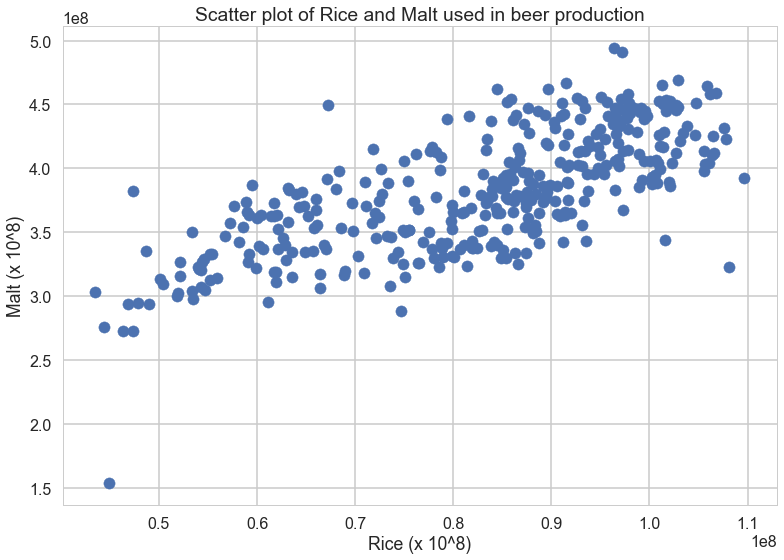

In [27]:
plt.scatter(beer[['rice']], beer[['malt']])
plt.title('Scatter plot of Rice and Malt used in beer production')
plt.xlabel('Rice (x 10^8)')
plt.ylabel('Malt (x 10^8)')
plt.show()

## 6. Can you make a time-series plot?

Yes, interesting time-series plots are how much a specific ingredient is used over the same year and over the same month throughout different years.  Below is an example of the use of corn throughout 2007.

In [28]:
data_2007 = beer[beer.year == 2007]
data_2007['month_num'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
data_2007

C:\Users\Crump\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,month,year,malt,corn,rice,barley,wheat,sorgum_grain,soy_bean,sugar_and_sirups,hops(dry),hops(extracts),other,month_num
279,jan,2007,365808358.0,41647092.0,81050102.0,2481649.0,1195381.0,NaN,NaN,83664091.0,2037567.0,411166.0,766720.0,1
280,feb,2007,350023506.0,40939359.0,75054651.0,2780262.0,1073583.0,NaN,NaN,86331629.0,1973961.0,429884.0,920711.0,2
281,mar,2007,389924508.0,39752958.0,75422823.0,6821290.0,1976929.0,NaN,NaN,106152007.0,5183266.0,466056.0,1923670.0,3
282,apr,2007,379931112.0,37886557.0,72746559.0,2709462.0,1666665.0,NaN,NaN,106182588.0,5682746.0,474943.0,1104034.0,4
283,may,2007,412701807.0,56962251.0,78247021.0,3869429.0,1678110.0,NaN,NaN,104150281.0,5988957.0,603244.0,1131669.0,5
284,jun,2007,413198856.0,45076694.0,77636721.0,8241690.0,2149793.0,NaN,NaN,98868794.0,5893539.0,562934.0,2725951.0,6
285,jul,2007,408708439.0,57107410.0,78702386.0,3020814.0,1127993.0,NaN,NaN,93425149.0,2418331.0,525473.0,1873952.0,7
286,aug,2007,398845537.0,54510910.0,78677206.0,3433529.0,1337207.0,NaN,NaN,88308909.0,5210245.0,506950.0,1747529.0,8
287,sep,2007,367322114.0,53366636.0,65980674.0,8360511.0,1738450.0,NaN,NaN,76375932.0,3705611.0,437143.0,1956766.0,9
288,oct,2007,345254554.0,50162812.0,62675182.0,4312125.0,1250716.0,NaN,NaN,75045558.0,4139309.0,530230.0,1188150.0,10


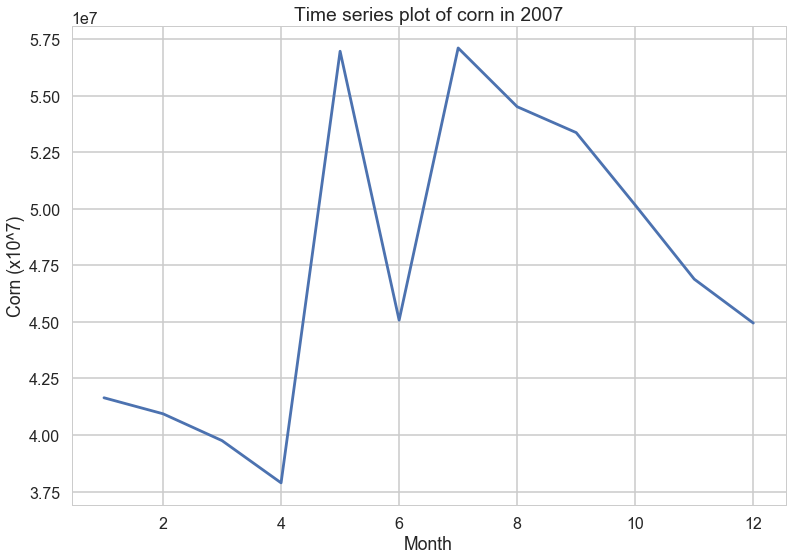

In [29]:
plt.plot(data_2007['month_num'], data_2007[['corn']])
plt.title('Time series plot of corn in 2007')
plt.xlabel('Month')
plt.ylabel('Corn (x10^7)')
plt.show()